In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,cross_val_score,KFold
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn import metrics
import seaborn as sns
sns.set(color_codes = True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing 'signal-data.csv' as a DataFrame
df1 = pd.read_csv("C:/Users/ruhee/OneDrive/Desktop/AIML/Featurization, Model Selection and Tuning/signal-data.csv")

In [3]:
# Creating a copy to keep the original data intact
df = df1.copy()
df

Time        0        1          2          3       4  \
0     2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1     2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2     2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3     2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4     2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   
...                   ...      ...      ...        ...        ...     ...   
1562  2008-10-16 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843   
1563  2008-10-16 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763   
1564  2008-10-17 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236   
1565  2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726   
1566  2008-10-17 06:07:00  2944.92  2450.76  2195.4444  2914.1792  1.5978   

          5         6       7       8  ...       581     582     583     584  \
0     100.0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   
1     100.0  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   
2     100.0   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   
3     100.0  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   
4     100.0  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045   
...     ...       ...     ...     ...  ...       ...     ...     ...     ...   
1562  100.0   82.2467  0.1248  1.3424  ...  203.1720  0.4988  0.0143  0.0039   
1563  100.0   98.4689  0.1205  1.4333  ...       NaN  0.4975  0.0131  0.0036   
1564  100.0   99.4122  0.1208     NaN  ...   43.5231  0.4987  0.0153  0.0041   
1565  100.0   98.7978  0.1213  1.4622  ...   93.4941  0.5004  0.0178  0.0038   
1566  100.0   85.1011  0.1235     NaN  ...  137.7844  0.4987  0.0181  0.0040   

          585     586     587     588       589  Pass/Fail  
0      2.3630     NaN     NaN     NaN       NaN         -1  
1      4.4447  0.0096  0.0201  0.0060  208.2045         -1  
2      3.1745  0.0584  0.0484  0.0148   82.8602          1  
3      2.0544  0.0202  0.0149  0.0044   73.8432         -1  
4     99.3032  0.0202  0.0149  0.0044   73.8432         -1  
...       ...     ...     ...     ...       ...        ...  
1562   2.8669  0.0068  0.0138  0.0047  203.1720         -1  
1563   2.6238  0.0068  0.0138  0.0047  203.1720         -1  
1564   3.0590  0.0197  0.0086  0.0025   43.5231         -1  
1565   3.5662  0.0262  0.0245  0.0075   93.4941         -1  
1566   3.6275  0.0117  0.0162  0.0045  137.7844         -1  

[1567 rows x 592 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [5]:
# Printing 5 point summary
df.describe()

0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.237214     0.008961     0.073897     0.015116  ...   
min     100.0    82.131100     0.000000     1.191000    -0.053400  ...   
25%     100.0    97.920000     0.121100     1.411200    -0.010800  ...   
50%     100.0   101.512200     0.122400     1.461600    -0.001300  ...   
75%     100.0   104.586700     0.123800     1.516900     0.008400  ...   
max     100.0   129.252200     0.128600     1.656400     0.074900  ...   

              581          582          583          584          585  \
count  618.000000  1566.000000  1566.000000  1566.000000  1566.000000   
mean    97.934373     0.500096     0.015318     0.003847     3.067826   
std     87.520966     0.003404     0.017180     0.003720     3.578033   
min      0.000000     0.477800     0.006000     0.001700     1.197500   
25%     46.184900     0.497900     0.011600     0.003100     2.306500   
50%     72.288900     0.500200     0.013800     0.003600     2.757650   
75%    116.539150     0.502375     0.016500     0.004100     3.295175   
max    737.304800     0.509800     0.476600     0.104500    99.303200   

               586          587          588          589    Pass/Fail  
count  1566.000000  1566.000000  1566.000000  1566.000000  1567.000000  
mean      0.021458     0.016475     0.005283    99.670066    -0.867262  
std       0.012358     0.008808     0.002867    93.891919     0.498010  
min      -0.016900     0.003200     0.001000     0.000000    -1.000000  
25%       0.013425     0.010600     0.003300    44.368600    -1.000000  
50%       0.020500     0.014800     0.004600    71.900500    -1.000000  
75%       0.027600     0.020300     0.006400   114.749700    -1.000000  
max       0.102800     0.079900     0.028600   737.304800     1.000000  

[8 rows x 591 columns]

There are features present in the data whose standard deviation is 0 which implies that all values in these features are the same.

The mean and standard deviation across features vary. This implies that the distribution is not uniform for all features.

The maximum value of many features are extreme which implies that there are many outliers present in the data.

The count of most of the features is not 1567 which implies that there are missing values.

In [6]:
# Writing a for loop which will remove all the features with 20%+ Null values
for col in df.columns:
    null_percentage = df[col].isnull().sum() / len(df)
    if null_percentage > 0.20:
        df = df.drop(col, axis = 1)

In [7]:
# Imputing remaining null values with mean of the feature
df.fillna(df.mean(), inplace=True)

In [8]:
# Identifying the features which are having same value for all the rows
nunique = df.nunique()
# For features having same value for all rows, there will only be 1 unique value for each row
columns_to_drop = nunique[nunique == 1].index
# Dropping the features which are having same value for all the rows
df = df.drop(columns_to_drop, axis = 1)

In [9]:
df.shape

(1567, 444)

In [10]:
df.dtypes.value_counts()

float64    442
object       1
int64        1
dtype: int64

In [11]:
# Deleting 'Time' feature since it is irrelevant
df = df.drop(columns = ['Time'], axis = 1)
df

0        1          2          3       4         6       7  \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235   
...       ...      ...        ...        ...     ...       ...     ...   
1562  2899.41  2464.36  2179.7333  3085.3781  1.4843   82.2467  0.1248   
1563  3052.31  2522.55  2198.5667  1124.6595  0.8763   98.4689  0.1205   
1564  2978.81  2379.78  2206.3000  1110.4967  0.8236   99.4122  0.1208   
1565  2894.92  2532.01  2177.0333  1183.7287  1.5726   98.7978  0.1213   
1566  2944.92  2450.76  2195.4444  2914.1792  1.5978   85.1011  0.1235   

             8         9        10  ...      577     582     583     584  \
0     1.500500  0.016200 -0.003400  ...  14.9509  0.5005  0.0118  0.0035   
1     1.496600 -0.000500 -0.014800  ...  10.9003  0.5019  0.0223  0.0055   
2     1.443600  0.004100  0.001300  ...   9.2721  0.4958  0.0157  0.0039   
3     1.488200 -0.012400 -0.003300  ...   8.5831  0.4990  0.0103  0.0025   
4     1.503100 -0.003100 -0.007200  ...  10.9698  0.4800  0.4766  0.1045   
...        ...       ...       ...  ...      ...     ...     ...     ...   
1562  1.342400 -0.004500 -0.005700  ...  11.7256  0.4988  0.0143  0.0039   
1563  1.433300 -0.006100 -0.009300  ...  17.8379  0.4975  0.0131  0.0036   
1564  1.462862 -0.000841  0.000146  ...  17.7267  0.4987  0.0153  0.0041   
1565  1.462200 -0.007200  0.003200  ...  19.2104  0.5004  0.0178  0.0038   
1566  1.462862 -0.000841  0.000146  ...  22.9183  0.4987  0.0181  0.0040   

          585       586       587       588         589  Pass/Fail  
0      2.3630  0.021458  0.016475  0.005283   99.670066         -1  
1      4.4447  0.009600  0.020100  0.006000  208.204500         -1  
2      3.1745  0.058400  0.048400  0.014800   82.860200          1  
3      2.0544  0.020200  0.014900  0.004400   73.843200         -1  
4     99.3032  0.020200  0.014900  0.004400   73.843200         -1  
...       ...       ...       ...       ...         ...        ...  
1562   2.8669  0.006800  0.013800  0.004700  203.172000         -1  
1563   2.6238  0.006800  0.013800  0.004700  203.172000         -1  
1564   3.0590  0.019700  0.008600  0.002500   43.523100         -1  
1565   3.5662  0.026200  0.024500  0.007500   93.494100         -1  
1566   3.6275  0.011700  0.016200  0.004500  137.784400         -1  

[1567 rows x 443 columns]

In [12]:
# Calculating variance inflation factor to check multicollinearity
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    high_vif = vif[vif["VIF"] > 5].sort_values("VIF",ascending = False)    
    return(high_vif)

There are no features with VIF > 5.

In [13]:
# Dropping features having correlation > 0.75
# Creating correlation matrix
corr_matrix = df.corr().abs()

# Selecting upper triangle of correlation matrix
upper_traingle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))

# Finding features with correlation > 0.75
features_to_drop = [column for column in upper_traingle.columns if any(upper_traingle[column] > 0.75)]

# Dropping the features with correlation > 0.75
df.drop(features_to_drop, axis=1, inplace=True)

In [14]:
df.shape

(1567, 213)

Features having correlation > 0.75 were dropped to reduce collinearity.

In [15]:
df['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

Target variable is highly imbalanced which has to be dealt later.

In [16]:
df.describe().T

count         mean         std        min         25%        50%  \
0          1567.0  3014.452896   73.480613  2743.2400  2966.66500  3011.8400   
1          1567.0  2495.850231   80.227793  2158.7500  2452.88500  2498.9100   
2          1567.0  2200.547318   29.380932  2060.6600  2181.09995  2200.9556   
3          1567.0  1396.376627  439.712852     0.0000  1083.88580  1287.3538   
4          1567.0     4.197013   56.103066     0.6815     1.01770     1.3171   
...           ...          ...         ...        ...         ...        ...   
583        1567.0     0.015318    0.017174     0.0060     0.01160     0.0138   
586        1567.0     0.021458    0.012354    -0.0169     0.01345     0.0205   
587        1567.0     0.016475    0.008805     0.0032     0.01060     0.0148   
589        1567.0    99.670066   93.861936     0.0000    44.36860    72.0230   
Pass/Fail  1567.0    -0.867262    0.498010    -1.0000    -1.00000    -1.0000   

                 75%        max  
0          3056.5400  3356.3500  
1          2538.7450  2846.4400  
2          2218.0555  2315.2667  
3          1590.1699  3715.0417  
4             1.5296  1114.5366  
...              ...        ...  
583           0.0165     0.4766  
586           0.0276     0.1028  
587           0.0203     0.0799  
589         114.7497   737.3048  
Pass/Fail    -1.0000     1.0000  

[213 rows x 8 columns]

In [17]:
# Separating the target variable
X = df.drop("Pass/Fail", 1)
y = df["Pass/Fail"]
col = list(X.columns)

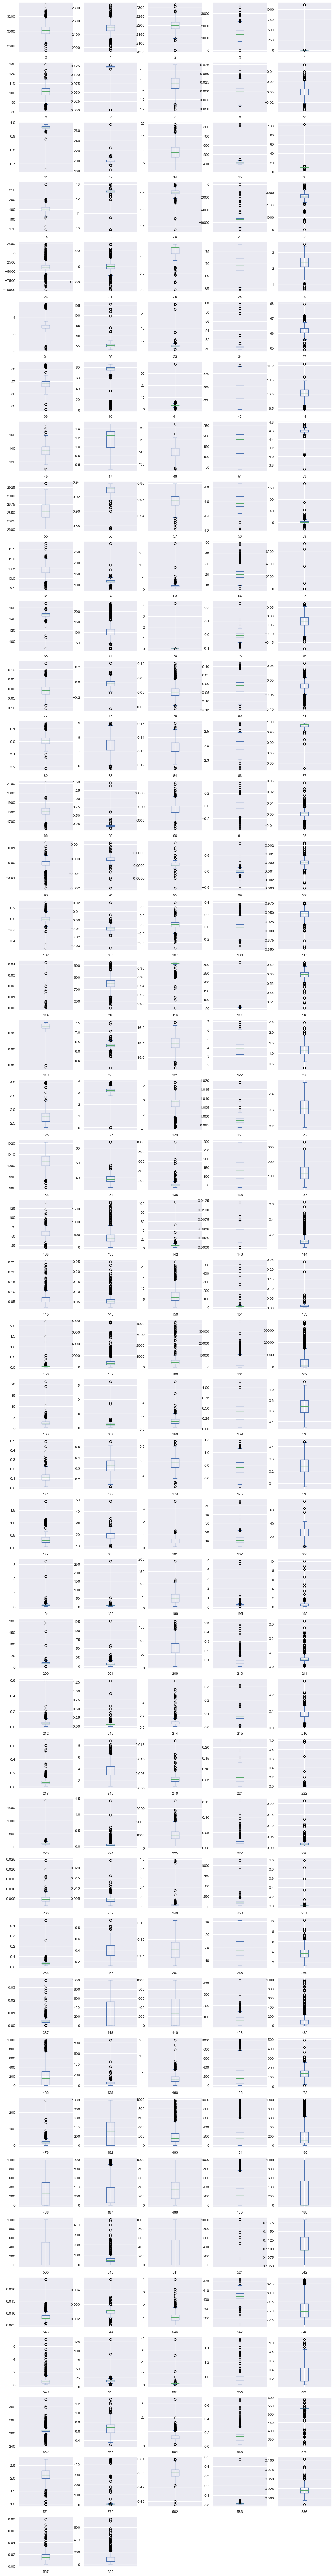

In [18]:
#Boxplot to check for outliers
X.plot(kind = 'box', subplots = True, layout = (52,5), fontsize = 10, figsize = (15,150));

Almost all features have outliers.

In [19]:
# Finding the outliers and replacing with median
for i in X.columns:
    Q1 = X[i].quantile(0.25)
    Q3 = X[i].quantile(0.75)
    IQR = Q3 - Q1
    
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    
    X.loc[(X[i] < low) | (X[i] > high), i] = X[i].median()

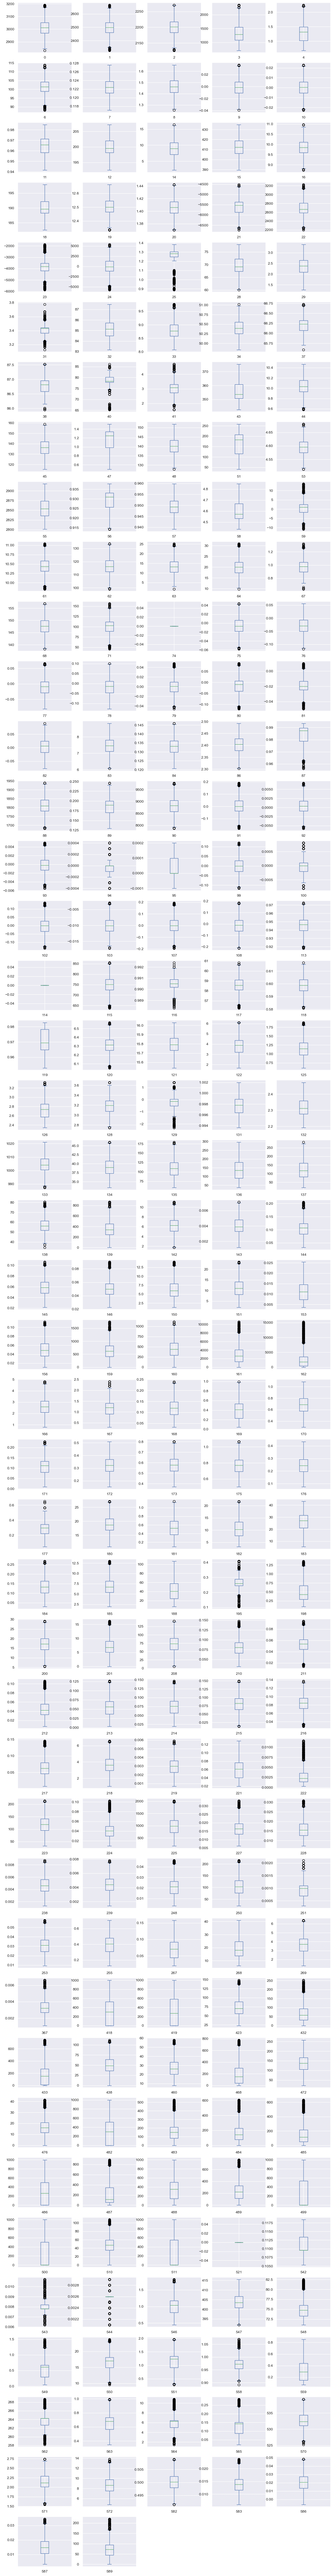

In [20]:
# Plotting a boxplot after treating the outliers
X.plot(kind = 'box', subplots = True, layout = (52,5), fontsize = 10, figsize = (15,150));

All previous outliers have been treated by replacing them with the median, the ones that are indicated above as new outliers are the ones that have emerged due to replacing the previous outliers with the median.

In [21]:
# Applying Standard Scaler for PCA
scaler = StandardScaler()
XScaled = scaler.fit_transform(X)
XScaled = pd.DataFrame(XScaled, columns = col)

In [22]:
# Applying PCA on the data
pca = PCA()
pca.fit(XScaled)

# Selecting the components that explain 90% of the variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.90) + 1

print('The number of components that explain 90% of the variance is', n_components)

The number of components that explain 90% of the variance is 140


In [23]:
# PCA with reduced number of components
pca = PCA(n_components = n_components, random_state = 1)
pca.fit(XScaled)
# Creating a DataFrame of the PCA features
pca_df = pd.DataFrame(pca.fit_transform(XScaled))

In [24]:
pca_df

0         1         2         3         4         5         6    \
0     3.644789  1.555988 -0.035591  1.236922  1.171604  0.324878 -1.524152   
1     1.630083  1.438580  1.354512  0.279991 -1.262334 -1.331637  0.551455   
2     0.591089 -0.278087  1.674860  1.491505 -1.501514  0.561300 -0.382948   
3     1.622691 -0.634193  1.932515  2.074932 -0.586182 -1.488348 -0.252609   
4     3.327173  0.725975  2.176364  0.978885 -1.287525 -0.582954 -2.396269   
...        ...       ...       ...       ...       ...       ...       ...   
1562 -3.453129 -0.382925  1.545624  1.571793  0.733279 -0.738340  6.201610   
1563 -1.123529 -4.706733  0.369503 -2.055760  2.008787  1.682830 -2.839609   
1564 -3.216324  1.560841 -1.157352  0.652980 -0.337359 -0.580814 -1.101839   
1565 -4.179351  0.001799  3.031601  0.680018  1.415056 -1.091310  4.633881   
1566 -3.518494 -3.407988  2.524325 -0.068791 -0.408080  0.160871  1.943270   

           7         8         9    ...       130       131       132  \
0    -1.047264 -1.276991  0.056900  ...  0.361503 -0.350125 -0.389705   
1     1.578536  0.351269  0.362444  ...  0.961946 -0.009490  0.343129   
2    -0.699674 -2.133496 -0.882795  ... -0.023015 -0.239584  1.330192   
3     1.054103  0.869499  0.582168  ...  0.805165 -0.219751 -0.965765   
4     1.257364  1.396617 -0.161709  ... -0.087908  0.823007  0.349860   
...        ...       ...       ...  ...       ...       ...       ...   
1562  1.254702 -1.000759  2.926702  ...  0.654111  0.829876 -0.800959   
1563  0.780663 -0.038896  0.732798  ... -0.472787 -0.707296  0.359716   
1564  1.325213 -1.078027  2.053913  ...  0.402379 -0.274064  0.252251   
1565 -0.725715  1.660152  1.751513  ... -1.541391  0.115685 -0.515081   
1566 -0.154048  1.560751  0.921114  ... -0.501392  0.480619  1.008398   

           133       134       135       136       137       138       139  
0    -1.095441  0.445512 -0.339276  0.735575 -0.513619  0.319935 -0.574856  
1     0.836309 -1.277822  0.238706  0.721098 -0.822355  0.994382  0.686088  
2    -0.635392 -1.176063  0.136263  0.680117  0.708619  0.965555  0.328532  
3    -0.506786 -0.352051  0.469337  0.505194 -1.226161 -0.532279  0.234126  
4     0.025129  0.620550  0.208983 -1.139646 -0.103639  0.643188  0.909207  
...        ...       ...       ...       ...       ...       ...       ...  
1562 -1.159662 -0.303341 -0.656271  0.338915 -1.203450  1.132289 -0.365437  
1563 -0.429094  0.192216  0.655569 -0.175979 -0.586564 -0.004743 -0.929638  
1564 -1.296790 -0.155815 -0.221857  0.874958 -0.170856  0.014300 -0.224303  
1565 -0.246566 -0.428123  0.287328 -0.391627 -0.296874  0.134970  1.197429  
1566 -0.119960 -0.014804  1.143502  0.920672 -1.226346  0.097940  0.824647  

[1567 rows x 140 columns]

Modifications made:

Features having 20%+ null values were dropped and null values of remaining features were replaced with mean of the features.

All features having the same value for all rows (features with 0 standard deviation) were dropped.

'Time' feature was removed since it is irrelevant to predict the Pass/Fail yield of a particular process.

Multicollinearity was checked using variance inflation factor but there were no features with vif > 5 so no features were eliminated.

Features having correlation higher than 0.75 were dropped since it implies collinearity.

All previous outliers were treated by replacing them with the median, the ones that are indicated as new outliers are the ones that have emerged due to replacing the previous outliers with the median.

Data was scaled using StandardScaler for PCA and number of components that explain 90% of variance of the data were selected.

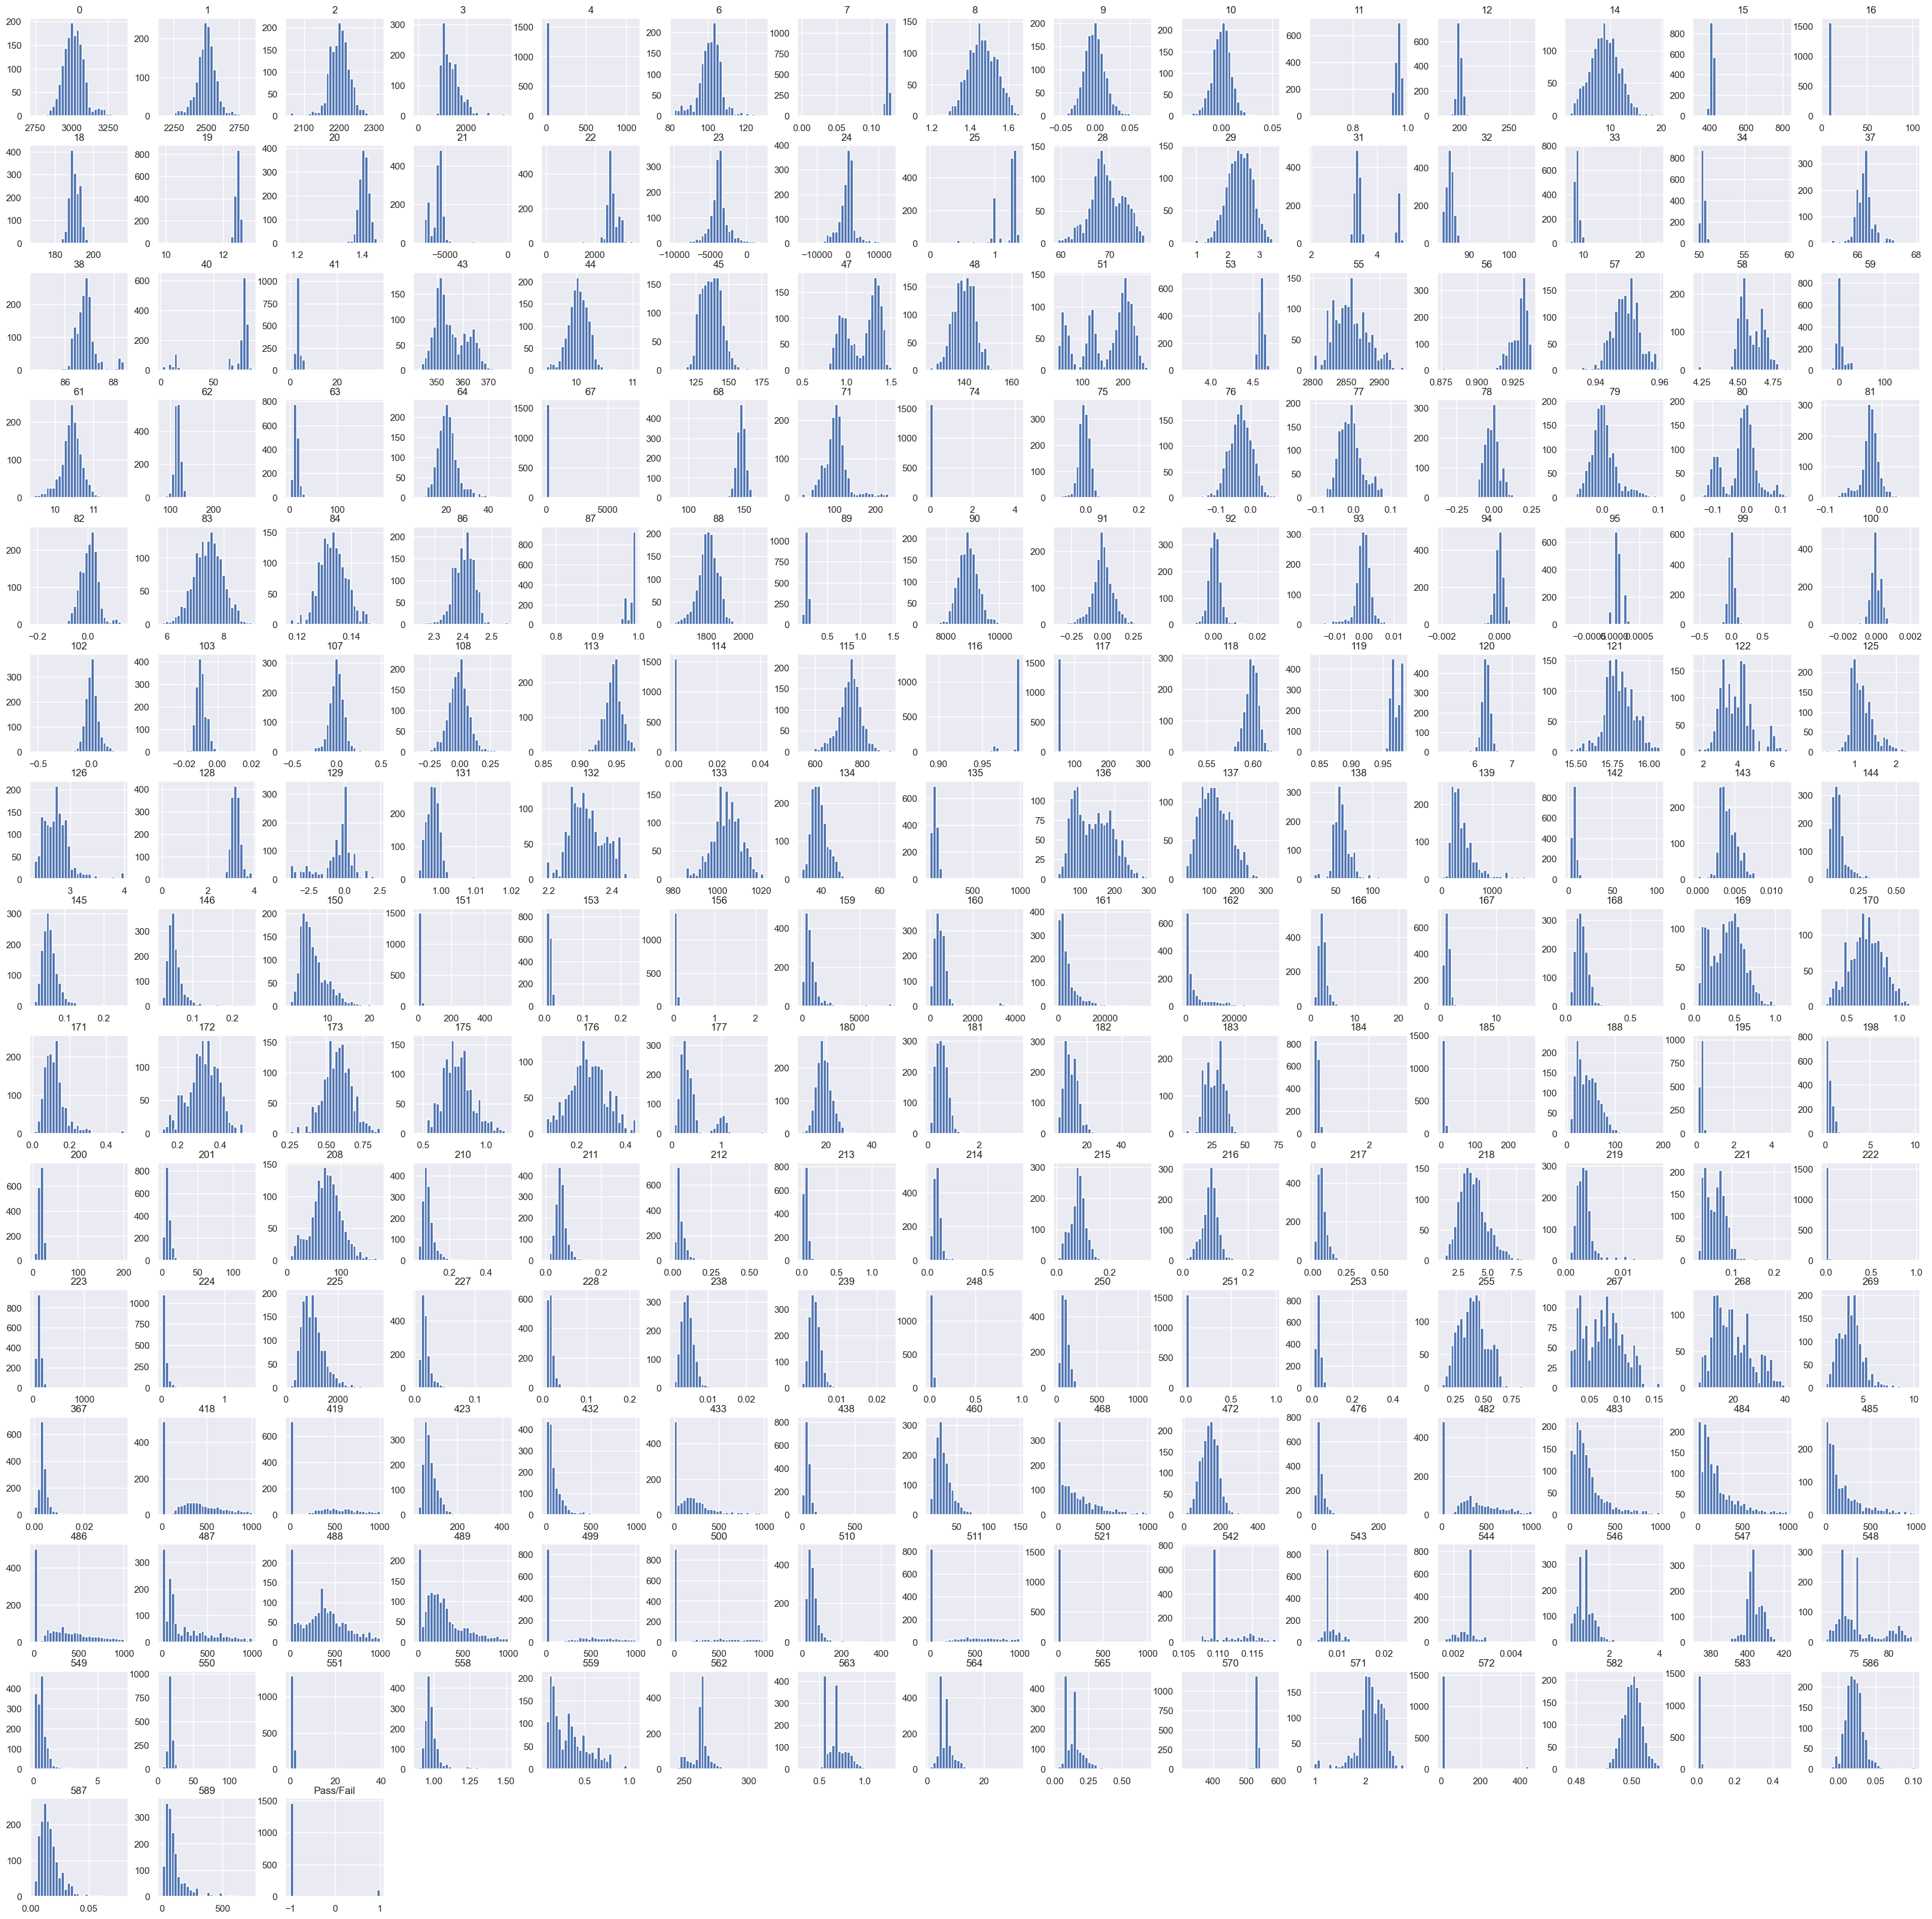

In [25]:
# Univariate Analysis
# Plotting histogram to check for the frequency of values within a feature
df.hist(bins = 30, figsize = (40, 40))
plt.show()

Many features seem to have a normal distribution.

There are features that have bars that are much tallers than the rest indicating extreme values.

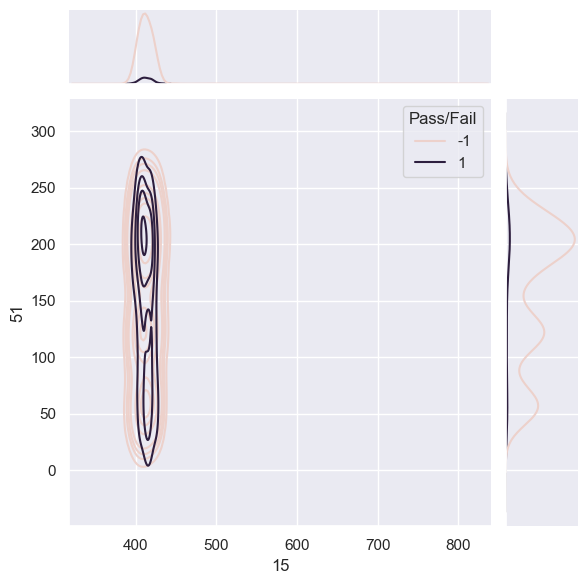

In [26]:
# Bivariate Analysis
sns.jointplot(data = df, x = "15", y = "51", hue = "Pass/Fail", kind = "kde");

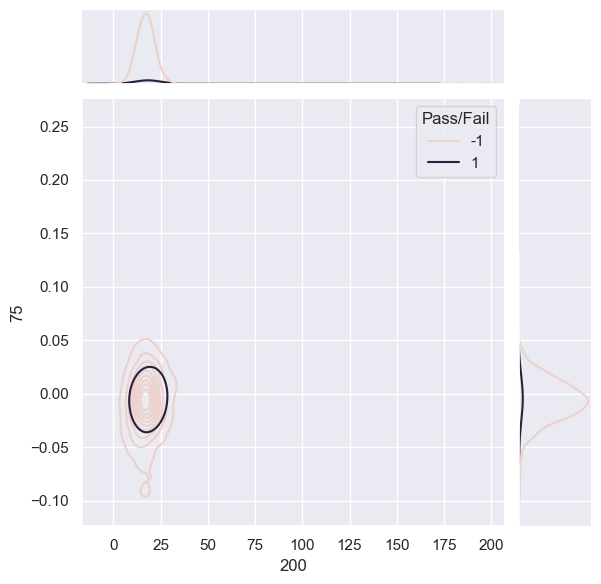

In [27]:
sns.jointplot(data = df, x = "200", y = "75", hue = "Pass/Fail", kind = "kde");

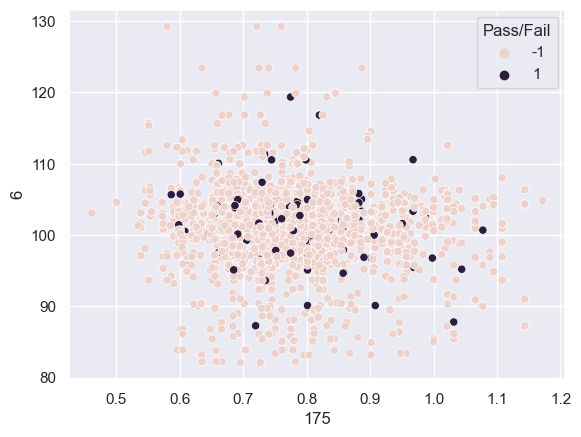

In [28]:
sns.scatterplot(data = df, x = "175", y = "6", hue = "Pass/Fail");

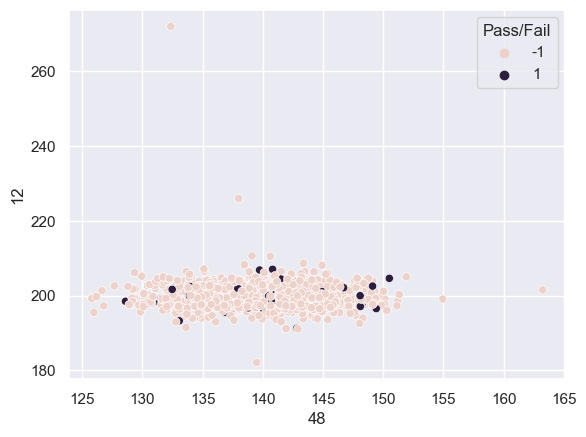

In [29]:
sns.scatterplot(data = df, x = "48", y = "12", hue = "Pass/Fail");

All above features have high proportion of failures.

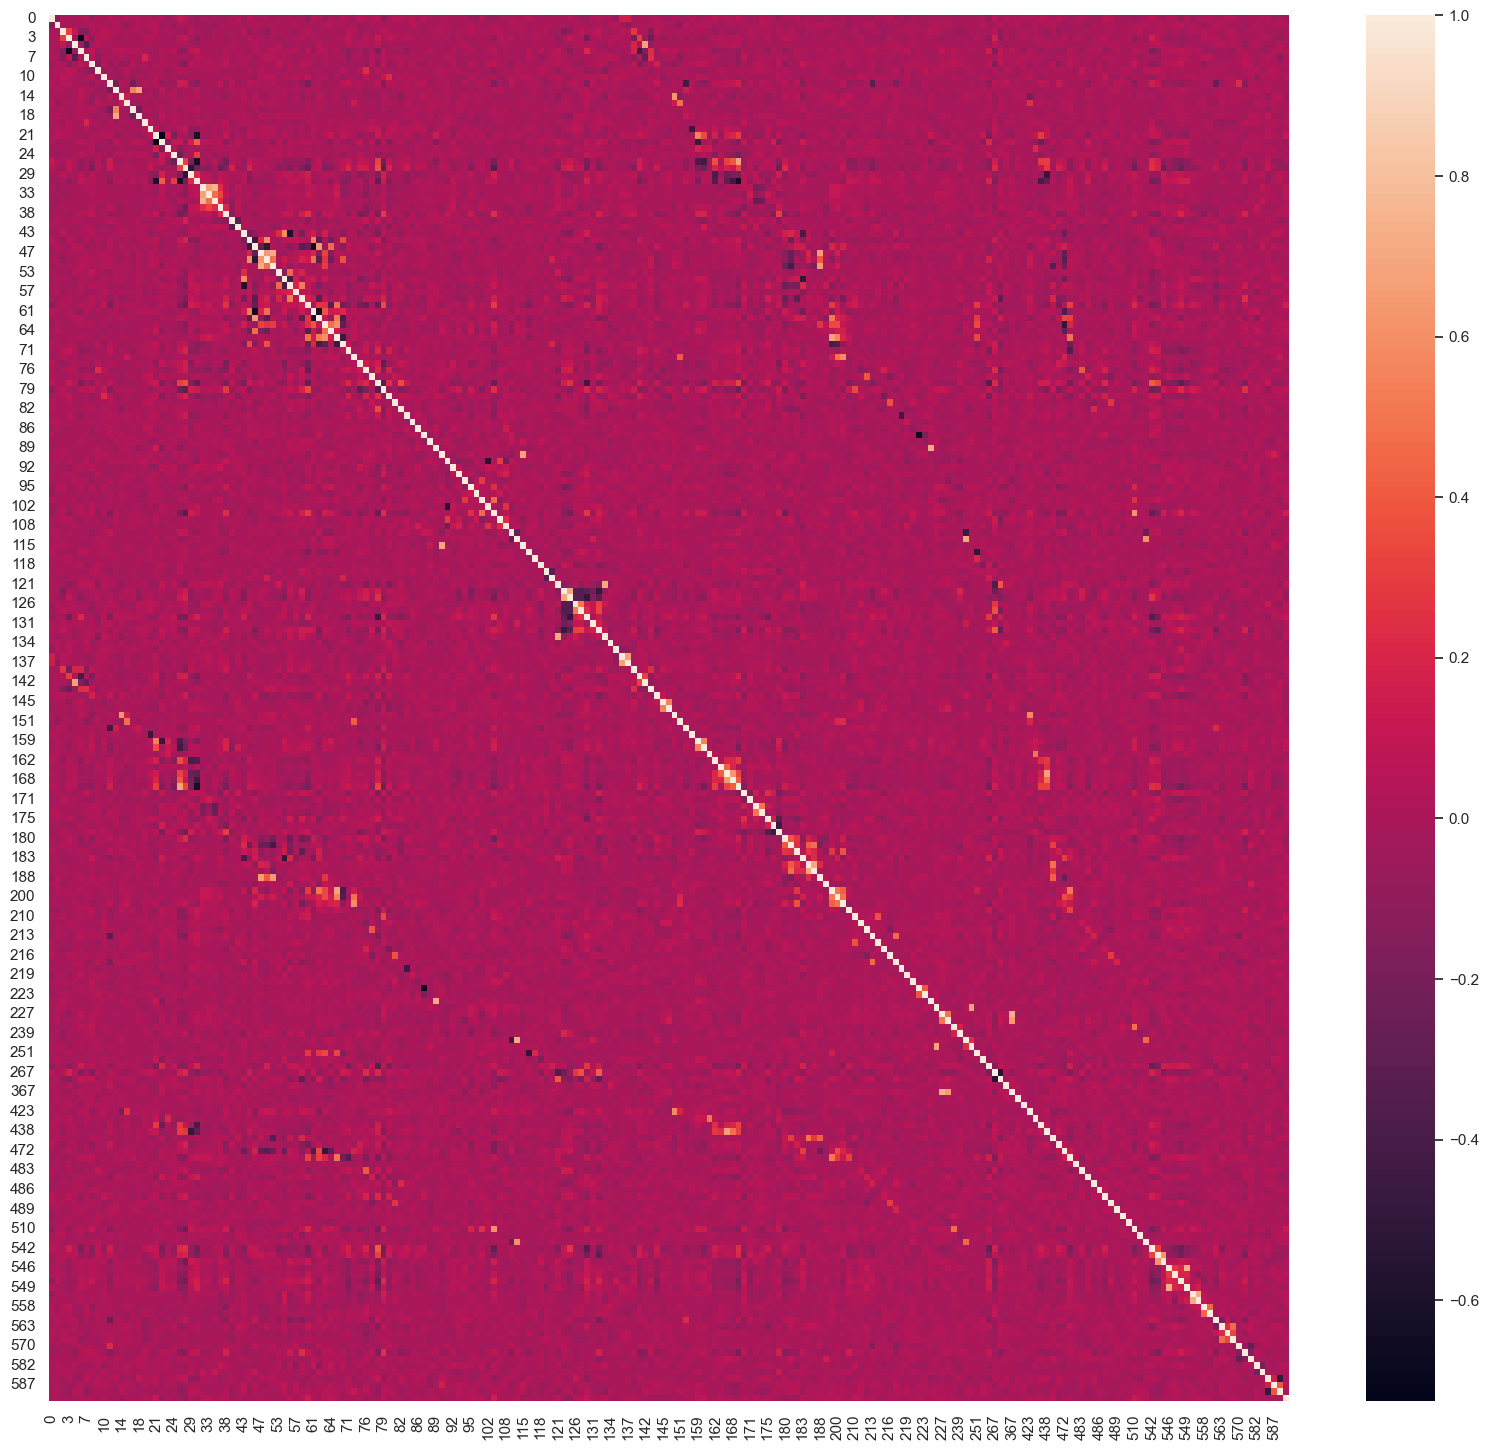

In [30]:
# Multivariate Analysis
plt.figure(figsize = (20,18))
corr = df.corr()
sns.heatmap(corr);

There are areas on the heat map where correlation is high. Most features have low correlation.

In [31]:
# Segregate predictors vs target attributes
# The original df was split into the target variable 'y' and dependent variables 'X'
# The dependent variables were standardized 'XScaled' and PCA was applied
# pca_df consists of the standardized dependent variables that explain 90% variance of the data
# The target variable y is 'Pass/Fail'

In [32]:
# Predictors = pca_df
# Target attributes = y

In [33]:
pca_df

0         1         2         3         4         5         6    \
0     3.644789  1.555988 -0.035591  1.236922  1.171604  0.324878 -1.524152   
1     1.630083  1.438580  1.354512  0.279991 -1.262334 -1.331637  0.551455   
2     0.591089 -0.278087  1.674860  1.491505 -1.501514  0.561300 -0.382948   
3     1.622691 -0.634193  1.932515  2.074932 -0.586182 -1.488348 -0.252609   
4     3.327173  0.725975  2.176364  0.978885 -1.287525 -0.582954 -2.396269   
...        ...       ...       ...       ...       ...       ...       ...   
1562 -3.453129 -0.382925  1.545624  1.571793  0.733279 -0.738340  6.201610   
1563 -1.123529 -4.706733  0.369503 -2.055760  2.008787  1.682830 -2.839609   
1564 -3.216324  1.560841 -1.157352  0.652980 -0.337359 -0.580814 -1.101839   
1565 -4.179351  0.001799  3.031601  0.680018  1.415056 -1.091310  4.633881   
1566 -3.518494 -3.407988  2.524325 -0.068791 -0.408080  0.160871  1.943270   

           7         8         9    ...       130       131       132  \
0    -1.047264 -1.276991  0.056900  ...  0.361503 -0.350125 -0.389705   
1     1.578536  0.351269  0.362444  ...  0.961946 -0.009490  0.343129   
2    -0.699674 -2.133496 -0.882795  ... -0.023015 -0.239584  1.330192   
3     1.054103  0.869499  0.582168  ...  0.805165 -0.219751 -0.965765   
4     1.257364  1.396617 -0.161709  ... -0.087908  0.823007  0.349860   
...        ...       ...       ...  ...       ...       ...       ...   
1562  1.254702 -1.000759  2.926702  ...  0.654111  0.829876 -0.800959   
1563  0.780663 -0.038896  0.732798  ... -0.472787 -0.707296  0.359716   
1564  1.325213 -1.078027  2.053913  ...  0.402379 -0.274064  0.252251   
1565 -0.725715  1.660152  1.751513  ... -1.541391  0.115685 -0.515081   
1566 -0.154048  1.560751  0.921114  ... -0.501392  0.480619  1.008398   

           133       134       135       136       137       138       139  
0    -1.095441  0.445512 -0.339276  0.735575 -0.513619  0.319935 -0.574856  
1     0.836309 -1.277822  0.238706  0.721098 -0.822355  0.994382  0.686088  
2    -0.635392 -1.176063  0.136263  0.680117  0.708619  0.965555  0.328532  
3    -0.506786 -0.352051  0.469337  0.505194 -1.226161 -0.532279  0.234126  
4     0.025129  0.620550  0.208983 -1.139646 -0.103639  0.643188  0.909207  
...        ...       ...       ...       ...       ...       ...       ...  
1562 -1.159662 -0.303341 -0.656271  0.338915 -1.203450  1.132289 -0.365437  
1563 -0.429094  0.192216  0.655569 -0.175979 -0.586564 -0.004743 -0.929638  
1564 -1.296790 -0.155815 -0.221857  0.874958 -0.170856  0.014300 -0.224303  
1565 -0.246566 -0.428123  0.287328 -0.391627 -0.296874  0.134970  1.197429  
1566 -0.119960 -0.014804  1.143502  0.920672 -1.226346  0.097940  0.824647  

[1567 rows x 140 columns]

In [34]:
# We already know the target variable is imbalanced as seen earlier
y.value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [35]:
# Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(pca_df, y, test_size = 0.2, random_state = 1, stratify = y)
X_train.shape, X_test.shape

((1253, 140), (314, 140))

In [36]:
# Oversampling the minority class using SMOTE to deal with the imbalance
smote = SMOTE()
Xs_train, ys_train = smote.fit_resample(X_train, y_train)
Xs_test, ys_test = smote.fit_resample(X_test, y_test)

In [37]:
ys_train.value_counts()

-1    1170
 1    1170
Name: Pass/Fail, dtype: int64

The data was already standarized earlier for performing PCA. Data has been split into train and test test. Target variable has been balanced using SMOTE.

In [38]:
# 5 point summary to see statistical characteristics of original data
df1.describe().T

count         mean         std        min          25%        50%  \
0          1561.0  3014.452896   73.621787  2743.2400  2966.260000  3011.4900   
1          1560.0  2495.850231   80.407705  2158.7500  2452.247500  2499.4050   
2          1553.0  2200.547318   29.513152  2060.6600  2181.044400  2201.0667   
3          1553.0  1396.376627  441.691640     0.0000  1081.875800  1285.2144   
4          1553.0     4.197013   56.355540     0.6815     1.017700     1.3168   
...           ...          ...         ...        ...          ...        ...   
586        1566.0     0.021458    0.012358    -0.0169     0.013425     0.0205   
587        1566.0     0.016475    0.008808     0.0032     0.010600     0.0148   
588        1566.0     0.005283    0.002867     0.0010     0.003300     0.0046   
589        1566.0    99.670066   93.891919     0.0000    44.368600    71.9005   
Pass/Fail  1567.0    -0.867262    0.498010    -1.0000    -1.000000    -1.0000   

                 75%        max  
0          3056.6500  3356.3500  
1          2538.8225  2846.4400  
2          2218.0555  2315.2667  
3          1591.2235  3715.0417  
4             1.5257  1114.5366  
...              ...        ...  
586           0.0276     0.1028  
587           0.0203     0.0799  
588           0.0064     0.0286  
589         114.7497   737.3048  
Pass/Fail    -1.0000     1.0000  

[591 rows x 8 columns]

In [39]:
# 5 point summary to see statistical characteristics of train data
Xs_train.describe().T

count      mean       std       min       25%       50%       75%  \
0    2340.0  0.509826  2.739167 -5.974927 -1.959969  0.787019  2.781919   
1    2340.0  0.011979  2.181731 -5.982382 -1.691015 -0.002149  1.617126   
2    2340.0  0.033354  2.016452 -5.332839 -1.410070 -0.099253  1.321127   
3    2340.0 -0.176262  1.846292 -5.337439 -1.497728 -0.217744  0.965192   
4    2340.0 -0.410338  1.747355 -5.157398 -1.727098 -0.476412  0.865765   
..      ...       ...       ...       ...       ...       ...       ...   
135  2340.0 -0.021435  0.685369 -2.383451 -0.500525 -0.003281  0.451413   
136  2340.0  0.055353  0.640054 -2.621613 -0.368400  0.067676  0.463996   
137  2340.0 -0.008076  0.686434 -1.978793 -0.463152 -0.007342  0.391370   
138  2340.0 -0.071284  0.620149 -2.263248 -0.460480 -0.084486  0.319499   
139  2340.0 -0.022930  0.681311 -2.202008 -0.485036 -0.065182  0.444435   

          max  
0    6.600783  
1    6.776613  
2    6.284217  
3    5.987990  
4    5.859107  
..        ...  
135  2.943416  
136  2.644035  
137  2.223083  
138  2.377305  
139  2.339492  

[140 rows x 8 columns]

In [40]:
# 5 point summary to see statistical characteristics of test data
Xs_test.describe().T

count      mean       std       min       25%       50%       75%  \
0    586.0  0.494587  2.914676 -5.906527 -2.146418  0.770109  2.695349   
1    586.0 -0.109703  2.279372 -5.760817 -1.804292 -0.160773  1.565377   
2    586.0  0.518418  1.932304 -5.327931 -0.884852  0.881364  1.880651   
3    586.0 -0.337078  1.768363 -5.250127 -1.420789 -0.595462  0.722379   
4    586.0 -0.524400  1.787993 -4.956158 -1.715628 -0.667964  0.688189   
..     ...       ...       ...       ...       ...       ...       ...   
135  586.0 -0.113543  0.635953 -1.960590 -0.568026 -0.109050  0.249153   
136  586.0 -0.006345  0.653757 -2.073975 -0.437462 -0.048978  0.443159   
137  586.0 -0.010662  0.594355 -1.883108 -0.454769  0.014451  0.346173   
138  586.0 -0.037996  0.648089 -1.969560 -0.466038 -0.013769  0.372928   
139  586.0 -0.002268  0.609353 -2.017164 -0.395440  0.004295  0.387580   

          max  
0    6.696636  
1    5.785719  
2    5.566962  
3    4.798479  
4    5.770369  
..        ...  
135  2.244031  
136  2.320330  
137  1.667919  
138  2.463277  
139  1.697605  

[140 rows x 8 columns]

The original data has very extrmeme values. As we can see the mean ranges from close to 0 to approximately 3000. The standard deviation also ranges from close to 0 to approximately 73.

The data is scaled in the train and test data due to the extreme values found in the original data. The mean and standard deviation from the train and test data seems to be pretty close to each other with a few exceptions which maybe due to different sizes of train and test data. Q1, median and Q3 values also seem to be close to each other in the train and test data.

This implies that both train and test data are relatively similar.

In [41]:
# Training a model using Gaussian Naive Bayes
nb_model_pca = GaussianNB()
nb_model_pca.fit(Xs_train, ys_train)

GaussianNB()

In [42]:
# Performance of model with training data
# Predicting the response
prediction = nb_model_pca.predict(Xs_train)
# Accuracy
nb_model_pca_training_acc = nb_model_pca.score(Xs_train, ys_train)
print(nb_model_pca.score(Xs_train, ys_train))

0.9098290598290598


In [43]:
# Performance of model with test data
# Predicting the response
prediction = nb_model_pca.predict(Xs_test)
# Accuracy
nb_model_pca_testing_acc = nb_model_pca.score(Xs_test, ys_test)
print(nb_model_pca.score(Xs_test, ys_test))

0.7986348122866894


In [44]:
# Confusion Matrix
print("Confusion Matrix:\n",confusion_matrix(ys_test, prediction))

Confusion Matrix:
 [[283  10]
 [108 185]]


In [45]:
# Classification Report
print('Classification  Report:\n',classification_report(ys_test, prediction))

Classification  Report:
               precision    recall  f1-score   support

          -1       0.72      0.97      0.83       293
           1       0.95      0.63      0.76       293

    accuracy                           0.80       586
   macro avg       0.84      0.80      0.79       586
weighted avg       0.84      0.80      0.79       586



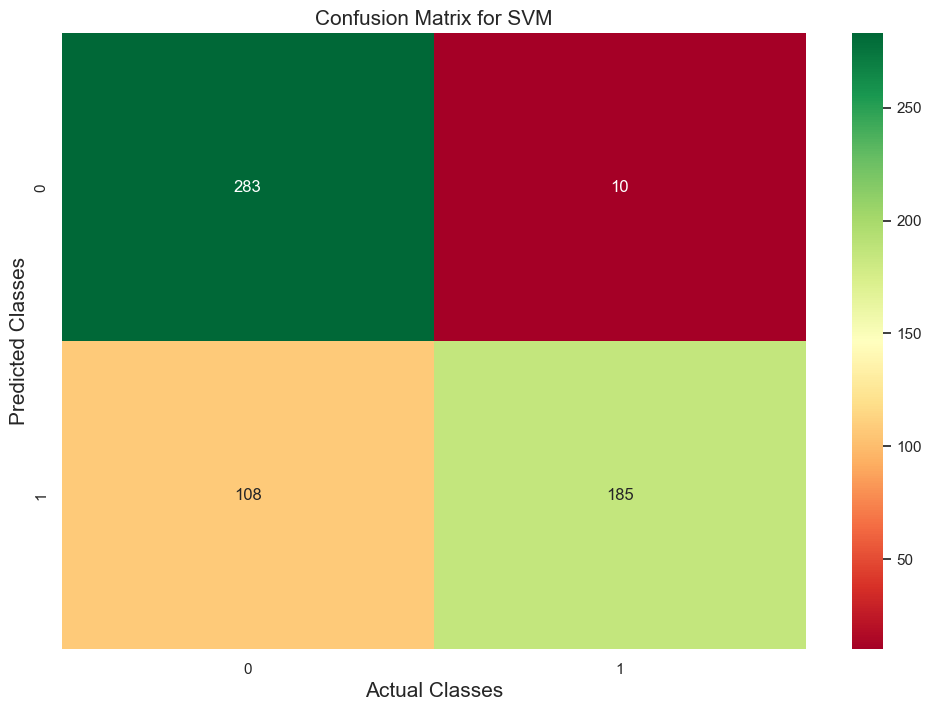

In [46]:
# Visualization of confusion matrix in the form of a heatmap
cm = confusion_matrix(ys_test, prediction)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVM', fontsize = 15);

In [47]:
# Using k fold cross validation
num_folds = 50
kfold_pca = KFold(n_splits = num_folds)
prediction = cross_val_score(nb_model_pca, Xs_train, ys_train, cv = kfold_pca)
kfold_pca_training_acc = prediction.mean()*100.0, prediction.std()*100.0
print("Accuracy: %.3f%% (%.3f%%)" % (prediction.mean()*100.0, prediction.std()*100.0))

Accuracy: 90.389% (4.373%)


In [48]:
prediction = cross_val_score(nb_model_pca, Xs_test, ys_test, cv = kfold_pca)
kfold_pca_testing_acc = prediction.mean()*100.0, prediction.std()*100.0
print("Accuracy: %.3f%% (%.3f%%)" % (prediction.mean()*100.0, prediction.std()*100.0))

Accuracy: 95.545% (4.946%)


In [49]:
# Using LOOCV cross validation
# LOOCV is same as k folds if k value is taken to be maximum number of data points
num_folds = 140
loocv_pca = KFold(n_splits = num_folds)
prediction = cross_val_score(nb_model_pca, Xs_train, ys_train, cv = loocv_pca)
loocv_pca_training_acc = prediction.mean()*100.0, prediction.std()*100.0
print("Accuracy: %.3f%% (%.3f%%)" % (prediction.mean()*100.0, prediction.std()*100.0))

Accuracy: 90.286% (6.730%)


In [50]:
prediction = cross_val_score(nb_model_pca, Xs_test, ys_test, cv = loocv_pca)
loocv_pca_testing_acc = prediction.mean()*100.0, prediction.std()*100.0
print("Accuracy: %.3f%% (%.3f%%)" % (prediction.mean()*100.0, prediction.std()*100.0))

Accuracy: 95.643% (9.370%)


In [51]:
# Stratified cross validation
stratified_kfold_pca = StratifiedKFold(n_splits = 10, random_state = 55, shuffle = True)
prediction = cross_val_score(nb_model_pca, Xs_train, ys_train, cv = stratified_kfold_pca)
stratified_kfold_pca_training_acc = prediction.mean()*100.0, prediction.std()*100.0
print("Accuracy: %.3f%% (%.3f%%)" % (prediction.mean()*100.0, prediction.std()*100.0))

Accuracy: 90.299% (1.863%)


In [52]:
prediction = cross_val_score(nb_model_pca, Xs_test, ys_test, cv = stratified_kfold_pca)
stratified_kfold_pca_testing_acc = prediction.mean()*100.0, prediction.std()*100.0
print("Accuracy: %.3f%% (%.3f%%)" % (prediction.mean()*100.0, prediction.std()*100.0))

Accuracy: 95.564% (3.067%)


In [53]:
# Grid Search
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num = 100)
}
# Best Accuracy was seen with LOOCV cross validation 
nb_model_grid = GridSearchCV(estimator = nb_model_pca, param_grid = param_grid_nb, verbose = 1, cv = loocv_pca,
                             n_jobs = -1, scoring = 'accuracy')
nb_model_grid.fit(Xs_train, ys_train)
best_parameters = nb_model_grid.best_params_
print("Best Hyper Parameters:\n", nb_model_grid.best_params_)

Fitting 140 folds for each of 100 candidates, totalling 14000 fits
Best Hyper Parameters:
 {'var_smoothing': 0.0023101297000831605}


In [54]:
# Building the tuned nb model
tuned_nb_pca = GaussianNB(**best_parameters)
tuned_nb_pca.fit(Xs_train, ys_train)
# Predicting the response
prediction = tuned_nb_pca.predict(Xs_train)
# Accuracy
tuned_nb_pca_training_acc = tuned_nb_pca.score(Xs_train, ys_train)
print(tuned_nb_pca.score(Xs_train, ys_train))

0.911965811965812


In [55]:
prediction = tuned_nb_pca.predict(Xs_test)
tuned_nb_pca_testing_acc = tuned_nb_pca.score(Xs_test, ys_test)
print(tuned_nb_pca.score(Xs_test, ys_test))

0.8139931740614335


Confusion Matrix:
 [[281  12]
 [ 97 196]]
Classification  Report:
               precision    recall  f1-score   support

          -1       0.74      0.96      0.84       293
           1       0.94      0.67      0.78       293

    accuracy                           0.81       586
   macro avg       0.84      0.81      0.81       586
weighted avg       0.84      0.81      0.81       586



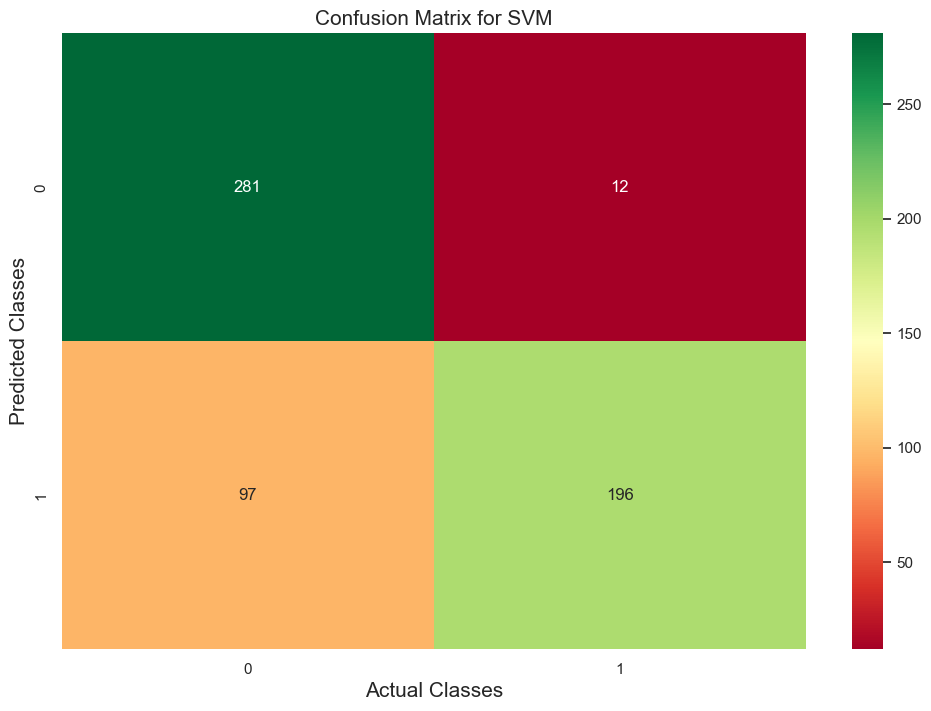

In [56]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(ys_test, prediction))
# Classification Report
print('Classification  Report:\n', classification_report(ys_test, prediction))
# Visualization of confusion matrix in the form of a heatmap
cm = confusion_matrix(ys_test, prediction)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVM', fontsize = 15);

In [57]:
classifiers = [['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['LogisticRegression :', LogisticRegression()],
               ['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()],
               ['AdaBoosting :',AdaBoostClassifier()],
               ['GradientBoosting :',GradientBoostingClassifier()]
]

In [58]:
for name,classifier in classifiers:
    clf = classifier.fit(Xs_train,ys_train)
    y_pred = classifier.predict(Xs_test)
    print(f'\n {name} \n')
    print(f'Training Score for {name}  {clf.score(Xs_train,ys_train) * 100:.2f}' )
    print(f'Testing Score for {name} {clf.score(Xs_test,ys_test) * 100:.2f}' )
    print(f'Classification report  \n {classification_report(ys_test,y_pred)}' )
    print(f'Confusion matrix  \n {confusion_matrix(ys_test,y_pred)}' )
    print(f'ROC AUC  : {roc_auc_score(ys_test,y_pred)}' )


 Naive Bayes : 

Training Score for Naive Bayes :  90.98
Testing Score for Naive Bayes : 79.86
Classification report  
               precision    recall  f1-score   support

          -1       0.72      0.97      0.83       293
           1       0.95      0.63      0.76       293

    accuracy                           0.80       586
   macro avg       0.84      0.80      0.79       586
weighted avg       0.84      0.80      0.79       586

Confusion matrix  
 [[283  10]
 [108 185]]
ROC AUC  : 0.7986348122866894

 KNeighbours : 

Training Score for KNeighbours :  60.94
Testing Score for KNeighbours : 57.17
Classification report  
               precision    recall  f1-score   support

          -1       1.00      0.14      0.25       293
           1       0.54      1.00      0.70       293

    accuracy                           0.57       586
   macro avg       0.77      0.57      0.48       586
weighted avg       0.77      0.57      0.48       586

Confusion matrix  
 [[ 42 251]


In [59]:
# Applying PCA on the data
pca = PCA()
pca.fit(pca_df)

# Selecting the components that explain 90% of the variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.90) + 1

print('The number of components that explain 90% of the variance is', n_components)

The number of components that explain 90% of the variance is 110


In [60]:
# PCA with reduced number of components
pca = PCA(n_components = n_components, random_state = 1)
pca.fit(pca_df)
# Creating a DataFrame of the PCA features
pca_df2 = pd.DataFrame(pca.fit_transform(pca_df))

In [61]:
# Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(pca_df2, y, test_size = 0.2, random_state = 1, stratify = y)
X_train.shape, X_test.shape

((1253, 110), (314, 110))

In [62]:
# Oversampling the minority class using SMOTE to deal with the imbalance
smote = SMOTE()
Xs_train, ys_train = smote.fit_resample(X_train, y_train)
Xs_test, ys_test = smote.fit_resample(X_test, y_test)

In [63]:
ys_train.value_counts()

-1    1170
 1    1170
Name: Pass/Fail, dtype: int64

In [64]:
classifiers = [['Naive Bayes after PCA :', GaussianNB()],
               ['KNeighbours after PCA :', KNeighborsClassifier()],
               ['SVM after PCA :', SVC()],
               ['LogisticRegression after PCA :', LogisticRegression()],
               ['DecisionTree after PCA :',DecisionTreeClassifier()],
               ['RandomForest after PCA :',RandomForestClassifier()],
               ['AdaBoosting after PCA :',AdaBoostClassifier()],
               ['GradientBoosting after PCA :',GradientBoostingClassifier()]
]

In [65]:
for name,classifier in classifiers:
    clf = classifier.fit(Xs_train,ys_train)
    y_pred = classifier.predict(Xs_test)
    print(f'\n {name} \n')
    print(f'Training Score for {name}  {clf.score(Xs_train,ys_train) * 100:.2f}' )
    print(f'Testing Score for {name} {clf.score(Xs_test,ys_test) * 100:.2f}' )
    print(f'Classification report  \n {classification_report(ys_test,y_pred)}' )
    print(f'Confusion matrix  \n {confusion_matrix(ys_test,y_pred)}' )
    print(f'ROC AUC  : {roc_auc_score(ys_test,y_pred)}' )


 Naive Bayes after PCA : 

Training Score for Naive Bayes after PCA :  89.74
Testing Score for Naive Bayes after PCA : 80.72
Classification report  
               precision    recall  f1-score   support

          -1       0.74      0.96      0.83       293
           1       0.94      0.66      0.77       293

    accuracy                           0.81       586
   macro avg       0.84      0.81      0.80       586
weighted avg       0.84      0.81      0.80       586

Confusion matrix  
 [[280  13]
 [100 193]]
ROC AUC  : 0.8071672354948806

 KNeighbours after PCA : 

Training Score for KNeighbours after PCA :  64.06
Testing Score for KNeighbours after PCA : 59.90
Classification report  
               precision    recall  f1-score   support

          -1       1.00      0.20      0.33       293
           1       0.55      1.00      0.71       293

    accuracy                           0.60       586
   macro avg       0.78      0.60      0.52       586
weighted avg       0.78   

In [66]:
# Training a model using Gaussian Naive Bayes
nb_model_pca2 = GaussianNB()
nb_model_pca2.fit(Xs_train, ys_train)

GaussianNB()

In [67]:
# Performance of model with training data
# Predicting the response
prediction = nb_model_pca2.predict(Xs_train)
# Accuracy
nb_model_pca2_training_acc = nb_model_pca2.score(Xs_train, ys_train)
print(nb_model_pca2.score(Xs_train, ys_train))

0.8974358974358975


In [68]:
# Performance of model with test data
# Predicting the response
prediction = nb_model_pca2.predict(Xs_test)
# Accuracy
nb_model_pca2_testing_acc = nb_model_pca2.score(Xs_test, ys_test)
print(nb_model_pca2.score(Xs_test, ys_test))

0.8071672354948806


Confusion Matrix:
 [[280  13]
 [100 193]]
Classification  Report:
               precision    recall  f1-score   support

          -1       0.74      0.96      0.83       293
           1       0.94      0.66      0.77       293

    accuracy                           0.81       586
   macro avg       0.84      0.81      0.80       586
weighted avg       0.84      0.81      0.80       586



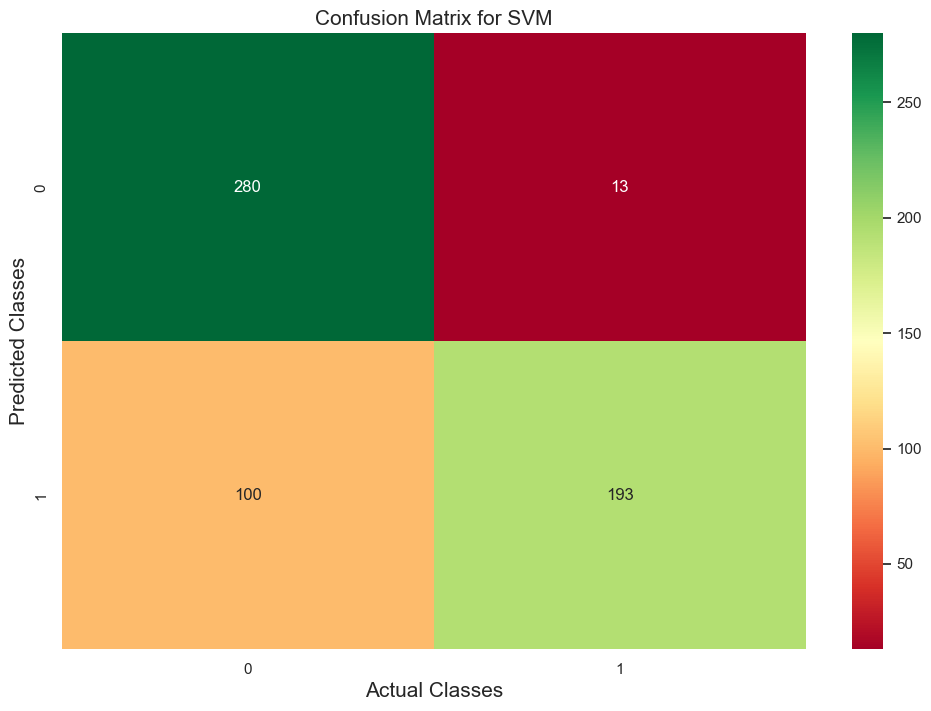

In [69]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(ys_test, prediction))
# Classification Report
print('Classification  Report:\n', classification_report(ys_test, prediction))
# Visualization of confusion matrix in the form of a heatmap
cm = confusion_matrix(ys_test, prediction)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVM', fontsize = 15);

In [70]:
# Using k fold cross validation
num_folds = 50
kfold_pca2 = KFold(n_splits = num_folds)
prediction = cross_val_score(nb_model_pca2, Xs_train, ys_train, cv = kfold_pca2)
kfold_pca2_training_acc = prediction.mean()*100.0, prediction.std()*100.0
print("Accuracy: %.3f%% (%.3f%%)" % (prediction.mean()*100.0, prediction.std()*100.0))

Accuracy: 89.348% (4.702%)


In [71]:
prediction = cross_val_score(nb_model_pca2, Xs_test, ys_test, cv = kfold_pca2)
kfold_pca2_testing_acc = prediction.mean()*100.0, prediction.std()*100.0
print("Accuracy: %.3f%% (%.3f%%)" % (prediction.mean()*100.0, prediction.std()*100.0))

Accuracy: 96.742% (4.842%)


In [72]:
# Using LOOCV cross validation
# LOOCV is same as k folds if k value is taken to be maximum number of data points
num_folds = 110
loocv_pca2 = KFold(n_splits = num_folds)
prediction = cross_val_score(nb_model_pca2, Xs_train, ys_train, cv = loocv_pca2)
loocv_pca2_training_acc = prediction.mean()*100.0, prediction.std()*100.0
print("Accuracy: %.3f%% (%.3f%%)" % (prediction.mean()*100.0, prediction.std()*100.0))

Accuracy: 89.299% (6.542%)


In [73]:
prediction = cross_val_score(nb_model_pca2, Xs_test, ys_test, cv = loocv_pca2)
loocv_pca2_testing_acc = prediction.mean()*100.0, prediction.std()*100.0
print("Accuracy: %.3f%% (%.3f%%)" % (prediction.mean()*100.0, prediction.std()*100.0))

Accuracy: 96.848% (7.147%)


In [74]:
# Stratified cross validation
stratified_kfold_pca2 = StratifiedKFold(n_splits = 10, random_state = 55, shuffle = True)
prediction = cross_val_score(nb_model_pca2, Xs_train, ys_train, cv = stratified_kfold_pca2)
stratified_kfold_pca2_training_acc = prediction.mean()*100.0, prediction.std()*100.0
print("Accuracy: %.3f%% (%.3f%%)" % (prediction.mean()*100.0, prediction.std()*100.0))

Accuracy: 89.359% (2.115%)


In [75]:
prediction = cross_val_score(nb_model_pca2, Xs_test, ys_test, cv = stratified_kfold_pca2)
stratified_kfold_pca2_testing_acc = prediction.mean()*100.0, prediction.std()*100.0
print("Accuracy: %.3f%% (%.3f%%)" % (prediction.mean()*100.0, prediction.std()*100.0))

Accuracy: 96.932% (2.251%)


In [76]:
# Grid Search
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num = 100)
}
# Best Accuracy was seen with stratified kfold cross validation 
nb_model_grid = GridSearchCV(estimator = nb_model_pca2, param_grid = param_grid_nb, verbose = 1, cv = stratified_kfold_pca2,
                             n_jobs = -1, scoring = 'accuracy')
nb_model_grid.fit(Xs_train, ys_train)
best_parameters = nb_model_grid.best_params_
print("Best Hyper Parameters:\n", nb_model_grid.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Hyper Parameters:
 {'var_smoothing': 0.006579332246575682}


In [77]:
# Building the tuned nb model
tuned_nb_pca2 = GaussianNB(**best_parameters)
tuned_nb_pca2.fit(Xs_train, ys_train)
# Predicting the response
prediction = tuned_nb_pca2.predict(Xs_train)
# Accuracy
tuned_nb_pca2_training_acc = tuned_nb_pca2.score(Xs_train, ys_train)
print(tuned_nb_pca2.score(Xs_train, ys_train))

0.9055555555555556


In [78]:
prediction = tuned_nb_pca2.predict(Xs_test)
tuned_nb_pca2_testing_acc = tuned_nb_pca2.score(Xs_test, ys_test)
print(f'Testing Accuracy : {tuned_nb_pca2.score(Xs_test, ys_test) * 100:.2f}' )

Testing Accuracy : 82.76


Confusion Matrix:
 [[273  20]
 [ 81 212]]
Classification  Report:
               precision    recall  f1-score   support

          -1       0.77      0.93      0.84       293
           1       0.91      0.72      0.81       293

    accuracy                           0.83       586
   macro avg       0.84      0.83      0.83       586
weighted avg       0.84      0.83      0.83       586



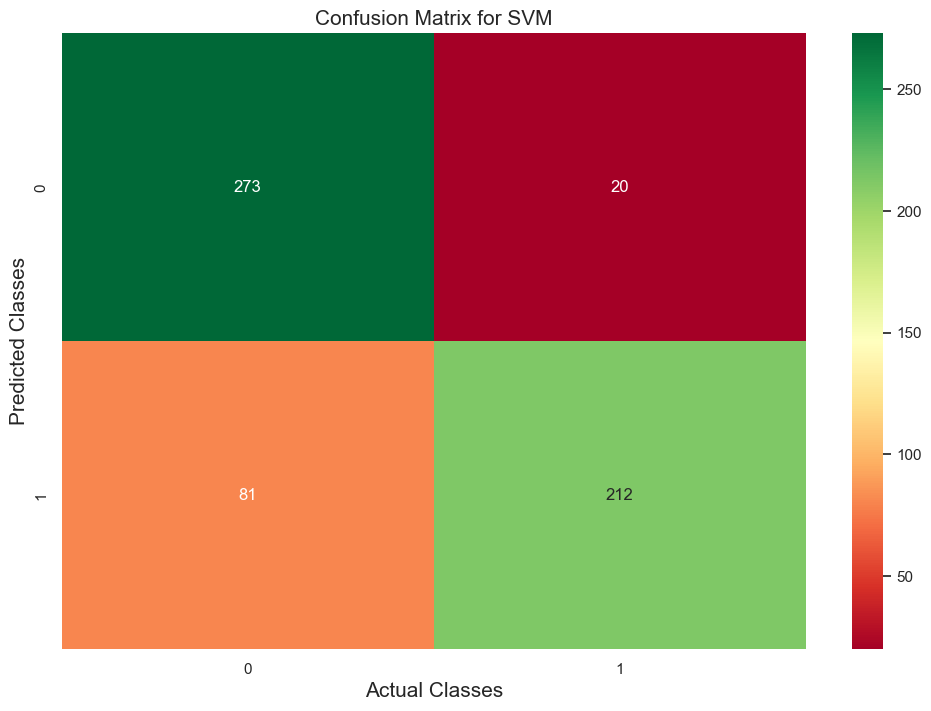

In [79]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(ys_test, prediction))
# Classification Report
print('Classification  Report:\n', classification_report(ys_test, prediction))
# Visualization of confusion matrix in the form of a heatmap
cm = confusion_matrix(ys_test, prediction)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVM', fontsize = 15);

In [80]:
print(nb_model_pca_training_acc)
print(nb_model_pca_testing_acc)
print(kfold_pca_training_acc)
print(kfold_pca_testing_acc)
print(loocv_pca_training_acc)
print(loocv_pca_testing_acc)
print(stratified_kfold_pca_training_acc)
print(stratified_kfold_pca_testing_acc)
print(tuned_nb_pca_training_acc)
print(tuned_nb_pca_testing_acc)
print(nb_model_pca2_training_acc)
print(nb_model_pca2_testing_acc)
print(kfold_pca2_training_acc)
print(kfold_pca2_testing_acc)
print(loocv_pca2_training_acc)
print(loocv_pca2_testing_acc)
print(stratified_kfold_pca2_training_acc)
print(stratified_kfold_pca2_testing_acc)
print(tuned_nb_pca2_training_acc)
print(tuned_nb_pca2_testing_acc)

0.9098290598290598
0.7986348122866894
(90.38852913968547, 4.372692486716284)
(95.54545454545453, 4.946082105161713)
(90.28623949579833, 6.730346934233625)
(95.64285714285715, 9.370219869787649)
(90.2991452991453, 1.8632674663753548)
(95.56399766218587, 3.067401251815317)
0.911965811965812
0.8139931740614335
0.8974358974358975
0.8071672354948806
(89.34782608695652, 4.701621328355814)
(96.74242424242425, 4.841970054931757)
(89.29948839039747, 6.542288707710739)
(96.84848484848486, 7.146891160488693)
(89.35897435897436, 2.1148449626766883)
(96.93161893629456, 2.251360234735413)
0.9055555555555556
0.8276450511945392


The model with the best accuracy is the stratified kfold Naive Bayes model done after doing PCA for the second time. Therefore, this is the best model. All other models have lower accuracies.

In [81]:
import pickle 

#our best model has been
best_model = nb_model_pca2
best_model.fit(Xs_train, ys_train)

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(best_model) 

# Save to file in the current working directory
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(best_model, file)

The original dataframe has 1567 rows and 592 columns. After removing features with 20% + null values, 'Time' feature, features with high correlation and doing PCA, the data was reduced to 140 features. Models were built on this data. PCA was done again features were reduced to 110. Models were built again on this data. The best result was seen with stratified kfold Naive Bayes after doing PCA for the second time.